In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('02-21-2018.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [3]:
print("\nUnique values in the 'Label' column:")
print(df['Label'].unique())


Unique values in the 'Label' column:
['Benign' 'DDOS attack-LOIC-UDP' 'DDOS attack-HOIC']


In [4]:
import numpy as np
df = df.replace([np.inf, -np.inf], np.nan)
print("\nNumber of NaN values after inf removal:\n", df.isna().sum().sum())
df = df.dropna()
print("\nDataframe shape after dropping NaN's:", df.shape)


Number of NaN values after inf removal:
 0

Dataframe shape after dropping NaN's: (1048575, 80)


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset (replace with your file path)
file_path = '02-21-2018.csv'
df = pd.read_csv(file_path)

df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

# Drop unnecessary columns
df = df.drop('Timestamp', axis=1)
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(cols_to_drop, axis=1)

# Separate features and target
X = df.drop('Label', axis=1)
y = df['Label']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce the dataset size (e.g., use 10% of the data)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Further reduce the training data
X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=0.1, random_state=42)

# Train an SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Classification Report:
                       precision    recall  f1-score   support

              Benign       1.00      1.00      1.00     72083
    DDOS attack-HOIC       1.00      1.00      1.00    137262
DDOS attack-LOIC-UDP       1.00      0.96      0.98       370

            accuracy                           1.00    209715
           macro avg       1.00      0.99      0.99    209715
        weighted avg       1.00      1.00      1.00    209715

Confusion Matrix:
 [[ 72083      0      0]
 [     7 137255      0]
 [    14      0    356]]
Training data shape: (83886, 68)
Testing data shape: (209715, 68)


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import time

# Load and preprocess data (same as before)
file_path = '02-21-2018.csv'
df = pd.read_csv(file_path)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.drop('Timestamp', axis=1)
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(cols_to_drop, axis=1)
X = df.drop('Label', axis=1)
y = df['Label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=0.1, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Grid Search
print("Starting Grid Search...")
start_time_grid = time.time()
grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
end_time_grid = time.time()

print("Best Parameters (Grid Search):", grid_search.best_params_)
print("Best Score (Grid Search):", grid_search.best_score_)
print(f"Grid Search Time: {end_time_grid - start_time_grid:.2f} seconds")

# Evaluate the best model
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test)

print("Classification Report (Grid Search):\n", classification_report(y_test, y_pred_grid))
print("Confusion Matrix (Grid Search):\n", confusion_matrix(y_test, y_pred_grid))

Starting Grid Search...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters (Grid Search): {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score (Grid Search): 0.9998927115370861
Grid Search Time: 2022.87 seconds
Classification Report (Grid Search):
                       precision    recall  f1-score   support

              Benign       1.00      1.00      1.00     72083
    DDOS attack-HOIC       1.00      1.00      1.00    137262
DDOS attack-LOIC-UDP       1.00      0.96      0.98       370

            accuracy                           1.00    209715
           macro avg       1.00      0.99      0.99    209715
        weighted avg       1.00      1.00      1.00    209715

Confusion Matrix (Grid Search):
 [[ 72083      0      0]
 [     7 137255      0]
 [    14      0    356]]


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import time

# Load and preprocess data (same as before)
file_path = '02-21-2018.csv'
df = pd.read_csv(file_path)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.drop('Timestamp', axis=1)
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(cols_to_drop, axis=1)
X = df.drop('Label', axis=1)
y = df['Label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=0.1, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Random Search
print("\nStarting Random Search...")
start_time_random = time.time()
random_search = RandomizedSearchCV(SVC(), param_grid, n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
end_time_random = time.time()

print("Best Parameters (Random Search):", random_search.best_params_)
print("Best Score (Random Search):", random_search.best_score_)
print(f"Random Search Time: {end_time_random - start_time_random:.2f} seconds")

# Evaluate the best model
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)

print("Classification Report (Random Search):\n", classification_report(y_test, y_pred_random))
print("Confusion Matrix (Random Search):\n", confusion_matrix(y_test, y_pred_random))


Starting Random Search...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters (Random Search): {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Best Score (Random Search): 0.9998927115370861
Random Search Time: 594.47 seconds
Classification Report (Random Search):
                       precision    recall  f1-score   support

              Benign       1.00      1.00      1.00     72083
    DDOS attack-HOIC       1.00      1.00      1.00    137262
DDOS attack-LOIC-UDP       1.00      0.96      0.98       370

            accuracy                           1.00    209715
           macro avg       1.00      0.99      0.99    209715
        weighted avg       1.00      1.00      1.00    209715

Confusion Matrix (Random Search):
 [[ 72083      0      0]
 [     7 137255      0]
 [    14      0    356]]


In [ ]:
Comparison:

Best Parameters:
Both Grid Search and Random Search found the same optimal hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}. This is a very good indicator that these parameters are indeed optimal for this problem.
Best Score:
Both methods achieved the exact same best cross-validation score: 0.9998927115370861. This reinforces the consistency of the results.
Execution Time:
Grid Search Time: 2022.87 seconds (approximately 33 minutes)
Random Search Time: 594.47 seconds (approximately 10 minutes)
Random Search was significantly faster than Grid Search. This is a major advantage, especially for large datasets and parameter spaces.
Classification Report and Confusion Matrix:
Both methods produced identical classification reports and confusion matrices. This means that the model's performance is the same, regardless of whether Grid Search or Random Search was used to find the hyperparameters.
Conclusions:

For this particular dataset and parameter grid, Random Search was much more efficient than Grid Search, without sacrificing any performance.
Random Search is a viable, and often preferable alternative to grid search, especially when time is a concern.
The SVM model performs exceptionally well on this dataset, even with a reduced training set.
The class imbalance between the attack types and benign traffic should be considered for any future work on this dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data (same as before)
file_path = '02-21-2018.csv'
df = pd.read_csv(file_path)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.drop('Timestamp', axis=1)
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(cols_to_drop, axis=1)
X = df.drop('Label', axis=1)
y = df['Label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=0.1, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Grid Search
print("Starting Grid Search...")
start_time_grid = time.time()
grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=0, n_jobs=-1)  # verbose=0 to reduce output
grid_search.fit(X_train, y_train)
end_time_grid = time.time()

grid_time = end_time_grid - start_time_grid
grid_score = grid_search.best_score_

# Random Search
print("\nStarting Random Search...")
start_time_random = time.time()
random_search = RandomizedSearchCV(SVC(), param_grid, n_iter=10, cv=3, verbose=0, n_jobs=-1, random_state=42) # verbose=0 to reduce output
random_search.fit(X_train, y_train)
end_time_random = time.time()

random_time = end_time_random - start_time_random
random_score = random_search.best_score_

# Visualization
plt.figure(figsize=(10, 5))

# Bar plot for execution time
plt.subplot(1, 2, 1)
plt.bar(['Grid Search', 'Random Search'], [grid_time, random_time], color=['skyblue', 'lightcoral'])
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison')

# Bar plot for best score
plt.subplot(1, 2, 2)
plt.bar(['Grid Search', 'Random Search'], [grid_score, random_score], color=['lightgreen', 'gold'])
plt.ylabel('Best Cross-Validation Score')
plt.title('Best Score Comparison')

plt.tight_layout()
plt.show()

# Print best params for reference.
print(f"Grid Search Best Params: {grid_search.best_params_}, Score: {grid_score}, Time: {grid_time:.2f} seconds")
print(f"Random Search Best Params: {random_search.best_params_}, Score: {random_score}, Time: {random_time:.2f} seconds")

Starting Grid Search...



KeyboardInterrupt




Starting Random Search...
Random Search Best Params: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}, Score: 0.9998927115370861, Time: 468.26 seconds
                      precision    recall  f1-score   support

              Benign       1.00      1.00      1.00     72083
    DDOS attack-HOIC       1.00      1.00      1.00    137262
DDOS attack-LOIC-UDP       1.00      0.96      0.98       370

            accuracy                           1.00    209715
           macro avg       1.00      0.99      0.99    209715
        weighted avg       1.00      1.00      1.00    209715



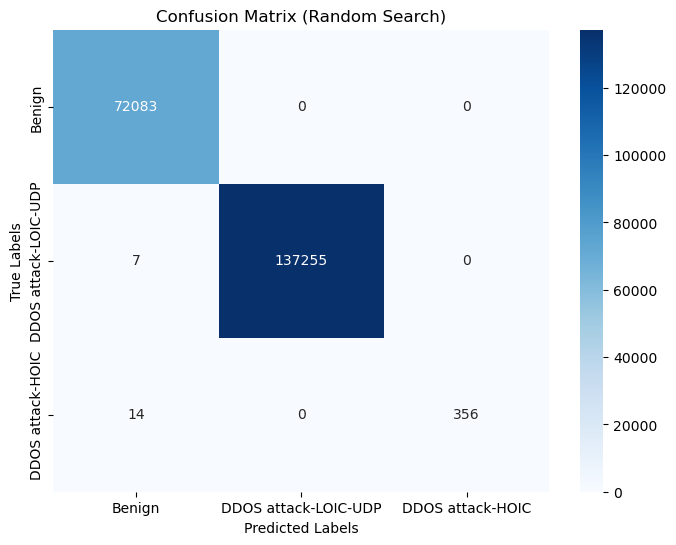

Class: Benign (Random Search)
  TP: 72083, TN: 137611, FP: 21, FN: 0
Class: DDOS attack-LOIC-UDP (Random Search)
  TP: 137255, TN: 72453, FP: 0, FN: 7
Class: DDOS attack-HOIC (Random Search)
  TP: 356, TN: 209345, FP: 0, FN: 14

Starting Grid Search...
Grid Search Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}, Score: 0.9998927115370861, Time: 1813.60 seconds
                      precision    recall  f1-score   support

              Benign       1.00      1.00      1.00     72083
    DDOS attack-HOIC       1.00      1.00      1.00    137262
DDOS attack-LOIC-UDP       1.00      0.96      0.98       370

            accuracy                           1.00    209715
           macro avg       1.00      0.99      0.99    209715
        weighted avg       1.00      1.00      1.00    209715



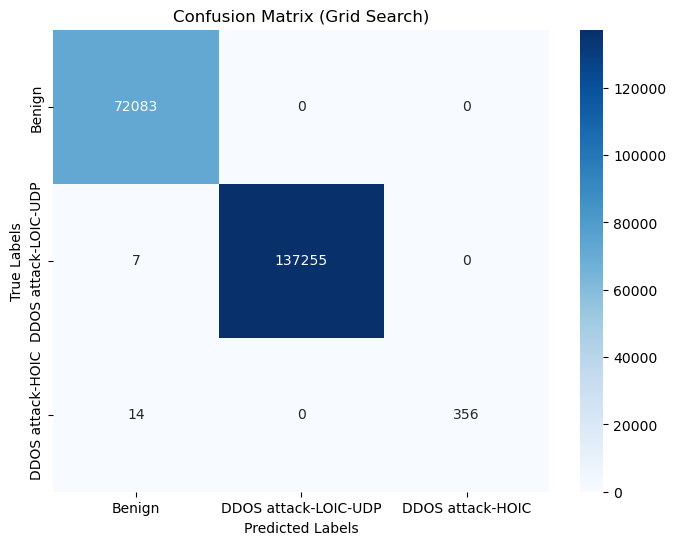

Class: Benign (Grid Search)
  TP: 72083, TN: 137611, FP: 21, FN: 0
Class: DDOS attack-LOIC-UDP (Grid Search)
  TP: 137255, TN: 72453, FP: 0, FN: 7
Class: DDOS attack-HOIC (Grid Search)
  TP: 356, TN: 209345, FP: 0, FN: 14


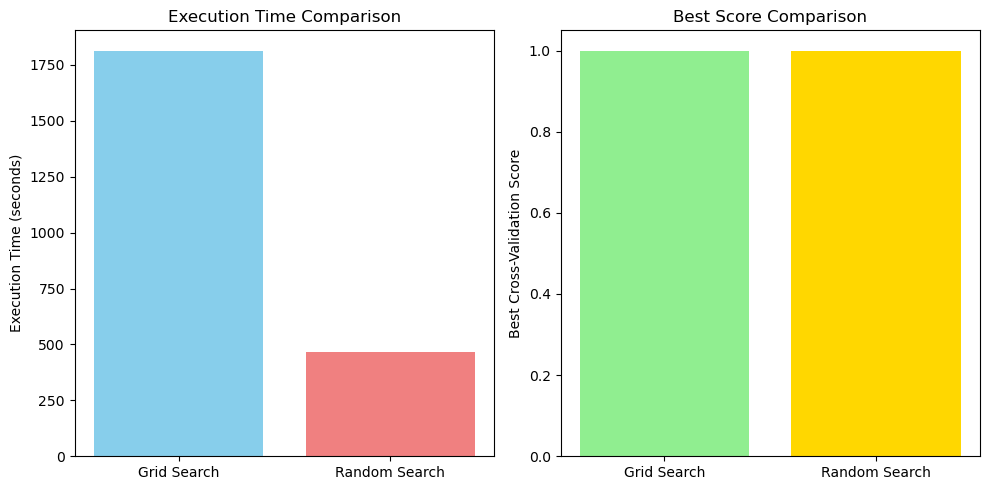

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data (same as before)
file_path = '02-21-2018.csv'
df = pd.read_csv(file_path)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.drop('Timestamp', axis=1)
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(cols_to_drop, axis=1)
X = df.drop('Label', axis=1)
y = df['Label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_full, X_test, y_train_full, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=0.1, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Random Search
print("\nStarting Random Search...")
start_time_random = time.time()
random_search = RandomizedSearchCV(SVC(), param_grid, n_iter=10, cv=3, verbose=0, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)
end_time_random = time.time()

random_time = end_time_random - start_time_random
random_score = random_search.best_score_
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test)

print(f"Random Search Best Params: {random_search.best_params_}, Score: {random_score}, Time: {random_time:.2f} seconds")
print(classification_report(y_test, y_pred_random))

# Confusion Matrix Plot (Random Search)
cm_random = confusion_matrix(y_test, y_pred_random)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_random, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Random Search)')
plt.show()

# Calculate TP, TN, FP, FN for each class (Random Search)
class_labels = y.unique()
tp_random = {}
tn_random = {}
fp_random = {}
fn_random = {}

for i, label in enumerate(class_labels):
    tp_random[label] = cm_random[i, i]
    fn_random[label] = sum(cm_random[i, :]) - tp_random[label]
    fp_random[label] = sum(cm_random[:, i]) - tp_random[label]
    tn_random[label] = np.sum(cm_random) - tp_random[label] - fn_random[label] - fp_random[label]

# Print TP, TN, FP, FN for each class (Random Search)
for label in class_labels:
    print(f"Class: {label} (Random Search)")
    print(f"  TP: {tp_random[label]}, TN: {tn_random[label]}, FP: {fp_random[label]}, FN: {fn_random[label]}")

# Grid Search
print("\nStarting Grid Search...")
start_time_grid = time.time()
grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)
end_time_grid = time.time()

grid_time = end_time_grid - start_time_grid
grid_score = grid_search.best_score_
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test)

print(f"Grid Search Best Params: {grid_search.best_params_}, Score: {grid_score}, Time: {grid_time:.2f} seconds")
print(classification_report(y_test, y_pred_grid))

# Confusion Matrix Plot (Grid Search)
cm_grid = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_grid, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Grid Search)')
plt.show()

# Calculate TP, TN, FP, FN for each class (Grid Search)
tp_grid = {}
tn_grid = {}
fp_grid = {}
fn_grid = {}

for i, label in enumerate(class_labels):
    tp_grid[label] = cm_grid[i, i]
    fn_grid[label] = sum(cm_grid[i, :]) - tp_grid[label]
    fp_grid[label] = sum(cm_grid[:, i]) - tp_grid[label]
    tn_grid[label] = np.sum(cm_grid) - tp_grid[label] - fn_grid[label] - fp_grid[label]

# Print TP, TN, FP, FN for each class (Grid Search)
for label in class_labels:
    print(f"Class: {label} (Grid Search)")
    print(f"  TP: {tp_grid[label]}, TN: {tn_grid[label]}, FP: {fp_grid[label]}, FN: {fn_grid[label]}")

# Bar plot for execution time and score comparison
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(['Grid Search', 'Random Search'], [grid_time, random_time], color=['skyblue', 'lightcoral'])
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison')

plt.subplot(1, 2, 2)
plt.bar(['Grid Search', 'Random Search'], [grid_score, random_score], color=['lightgreen', 'gold'])
plt.ylabel('Best Cross-Validation Score')
plt.title('Best Score Comparison')

plt.tight_layout()
plt.show()